# SBCAS2020 - February - Hierarchical and Kmeans

# 1. Import

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import *
import seaborn as sns
sns.set()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 931kB 3.3MB/s 
     |████████████████████████████████| 10.4MB 18.6MB/s 
     |████████████████████████████████| 14.7MB 61.4MB/s 


In [ ]:
import geopandas

In [ ]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=98c3abacd914282da16488db9c9d37f3061b0eb51bc5ae85a71fa6c6b79f382b
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving february-dataset.csv to february-dataset.csv
time: 8.14 s


## Read CSV

In [ ]:
df = pd.read_csv('february-dataset.csv', sep=',', index_col='location')

time: 19.8 ms


## Verify import

In [ ]:
df.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
Australia,0.060000,0.19,0.65,0.16,0.020000,0.000000,0.000000,0.000000e+00,3.249129,0.938
Belgium,0.008772,0.17,0.64,0.19,0.000000,0.000000,0.000000,0.000000e+00,377.214927,0.919
Cambodia,0.006173,0.31,0.64,0.05,0.000000,0.000000,0.000000,0.000000e+00,92.056413,0.581
Canada,0.021563,0.16,0.67,0.17,0.018868,0.000000,0.000385,0.000000e+00,4.075308,0.922
China,5.333525,0.18,0.71,0.11,4.043369,0.125799,0.303111,4.894578e-12,148.348833,0.758


time: 44.4 ms


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Australia to Vietnam
Data columns (total 10 columns):
totalcases    26 non-null float64
young         26 non-null float64
adult         26 non-null float64
older         26 non-null float64
prevalence    26 non-null float64
incidence     26 non-null float64
incidence7    26 non-null float64
deathrate     26 non-null float64
density       26 non-null float64
hdi           26 non-null float64
dtypes: float64(10)
memory usage: 2.2+ KB
time: 5.82 ms


In [ ]:
df.describe()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.283460,0.197308,0.666154,0.136154,0.199596,0.009320,0.015618,0.001447,484.789367,0.828923
std,1.067422,0.063091,0.052083,0.069804,0.800752,0.028433,0.061034,0.007260,1530.451489,0.115430
min,0.000222,0.120000,0.600000,0.010000,0.000000,0.000000,0.000000,0.000000,3.249129,0.579000
25%,0.004590,0.152500,0.640000,0.070000,0.000000,0.000000,0.000000,0.000000,92.424574,0.759750
50%,0.015144,0.180000,0.650000,0.145000,0.004896,0.000000,0.000000,0.000000,142.123020,0.887000
75%,0.055889,0.237500,0.685000,0.190000,0.021667,0.000000,0.000405,0.000000,336.200503,0.920000
max,5.333525,0.340000,0.840000,0.280000,4.043369,0.125799,0.303111,0.037037,7952.998418,0.939000


time: 72.5 ms


# 2. Dataprep

### Data analysis per features

In [ ]:
scaler = StandardScaler()

time: 1.33 ms


In [ ]:
data = df.copy()

time: 2.24 ms


In [ ]:
data.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
Australia,0.060000,0.19,0.65,0.16,0.020000,0.000000,0.000000,0.000000e+00,3.249129,0.938
Belgium,0.008772,0.17,0.64,0.19,0.000000,0.000000,0.000000,0.000000e+00,377.214927,0.919
Cambodia,0.006173,0.31,0.64,0.05,0.000000,0.000000,0.000000,0.000000e+00,92.056413,0.581
Canada,0.021563,0.16,0.67,0.17,0.018868,0.000000,0.000385,0.000000e+00,4.075308,0.922
China,5.333525,0.18,0.71,0.11,4.043369,0.125799,0.303111,4.894578e-12,148.348833,0.758


time: 51.5 ms


In [ ]:
col_names = ['totalcases','prevalence','incidence','incidence7','density','hdi']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data[col_names] = features

time: 14 ms


In [ ]:
data.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
Australia,-0.213491,0.19,0.65,0.16,-0.228726,-0.334263,-0.260951,0.000000e+00,-0.320870,0.963679
Belgium,-0.262434,0.17,0.64,0.19,-0.254197,-0.334263,-0.260951,0.000000e+00,-0.071681,0.795817
Cambodia,-0.264917,0.31,0.64,0.05,-0.254197,-0.334263,-0.260951,0.000000e+00,-0.261694,-2.190365
Canada,-0.250213,0.16,0.67,0.17,-0.230168,-0.334263,-0.254517,0.000000e+00,-0.320320,0.822321
China,4.824780,0.18,0.71,0.11,4.895263,4.177691,4.803636,4.894578e-12,-0.224184,-0.626595


time: 26.5 ms


# 3. Model building and implementation

## Dendrogram and cluster visualization (Full, PCA2, PCA3)

In [ ]:
hierarc_clustering_full = sch.linkage(data, method = 'ward')

time: 11.4 ms


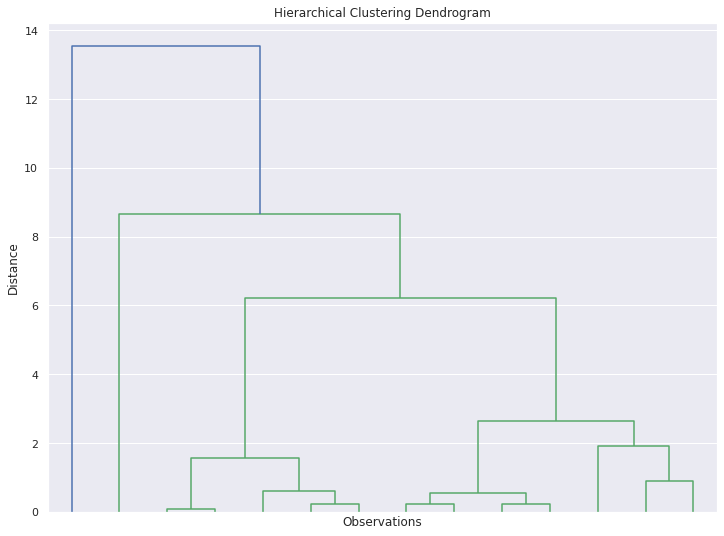

time: 225 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_full, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

In [ ]:
reduced_data2 = PCA(n_components=2).fit_transform(data)

time: 20.6 ms


In [ ]:
hierarc_clustering_pca2 = sch.linkage(reduced_data2, method = 'ward')

time: 2.66 ms


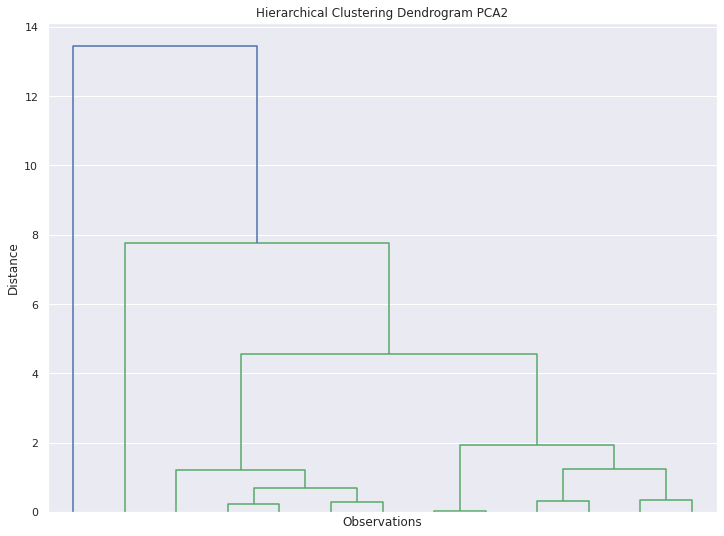

time: 202 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram PCA2')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_pca2, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

In [ ]:
reduced_data3 = PCA(n_components=3).fit_transform(data)

time: 4.65 ms


In [ ]:
hierarc_clustering_pca3 = sch.linkage(reduced_data3, method = 'ward')

time: 2.25 ms


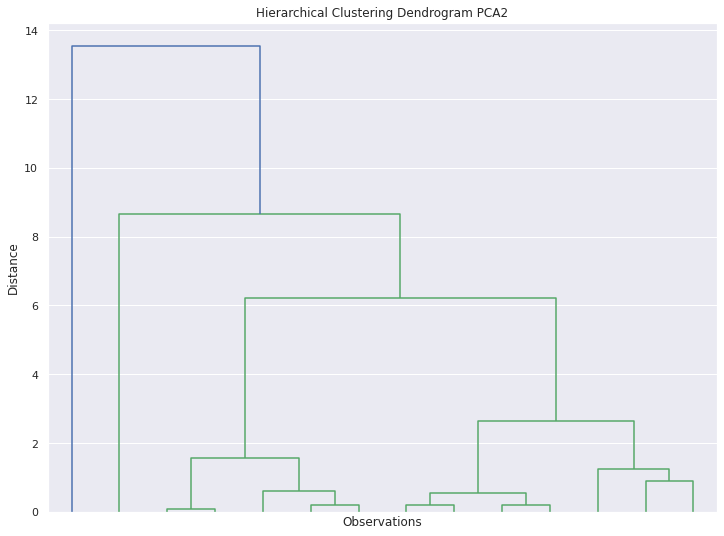

time: 220 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram PCA2')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_pca3, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

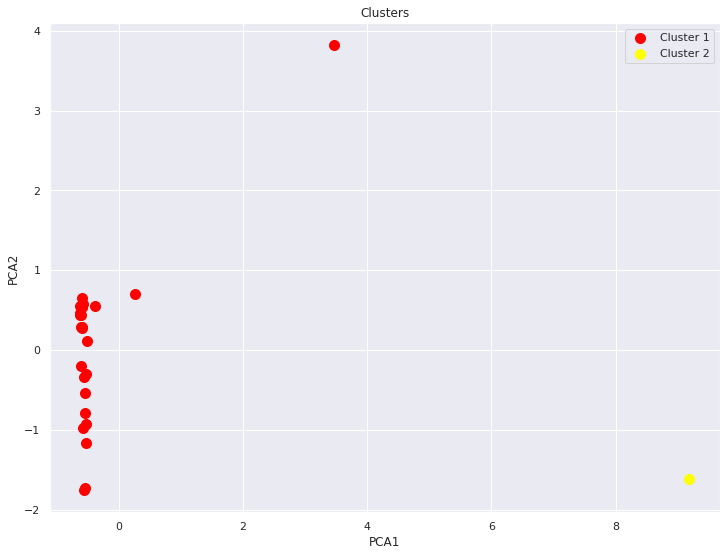

time: 369 ms


In [ ]:
#2 clusters
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
#plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

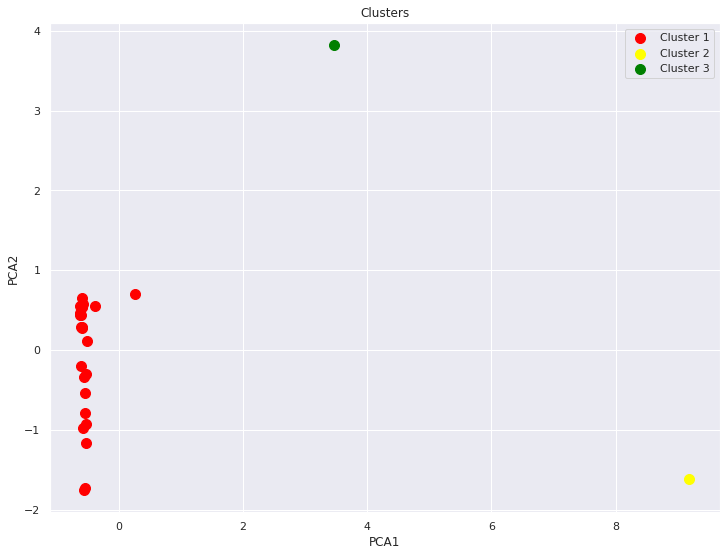

time: 358 ms


In [ ]:
#3 clusters
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

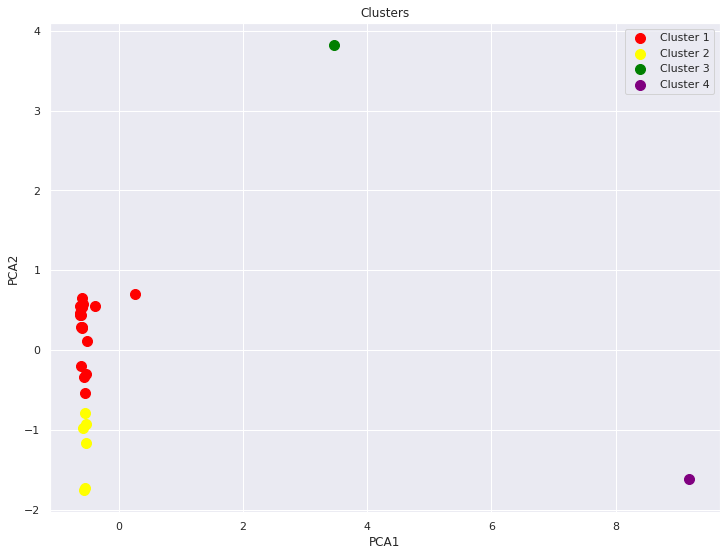

time: 389 ms


In [ ]:
#4 clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

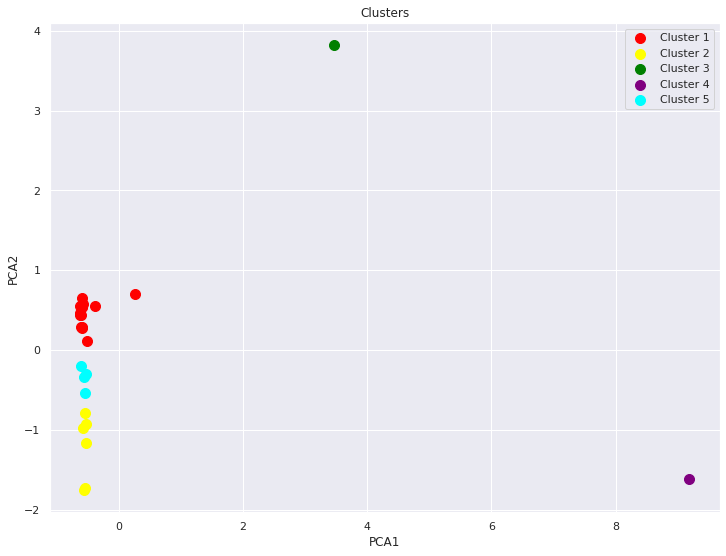

time: 382 ms


In [ ]:
#5 clusters
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Kmeans

#### Elbow method dataset no standardization

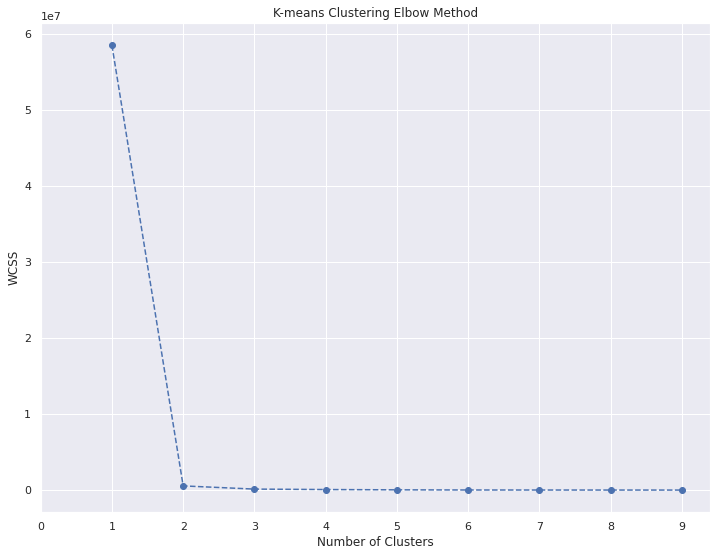

time: 469 ms


In [ ]:
wcss =[]
for i in range(1,10):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(df)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 10, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset standardized

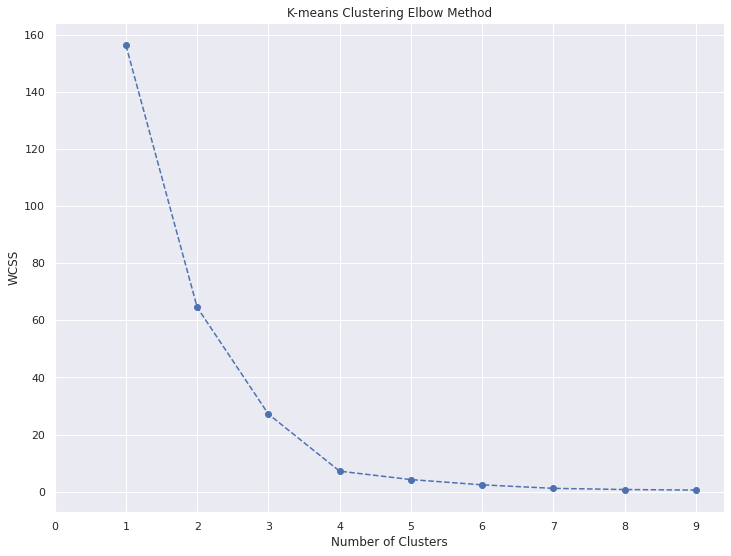

time: 483 ms


In [ ]:
wcss =[]
for i in range(1,10):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(data)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 10, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset PCA2

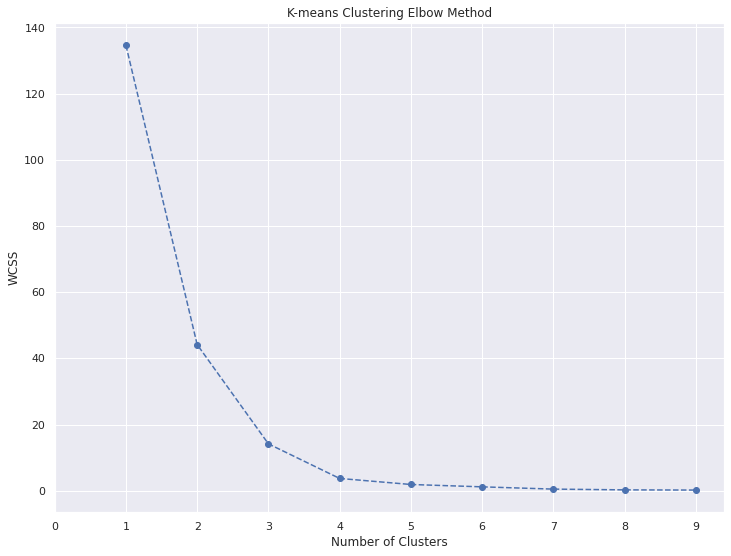

time: 451 ms


In [ ]:
wcss =[]
for i in range(1,10):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(reduced_data2)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 10, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset PCA3

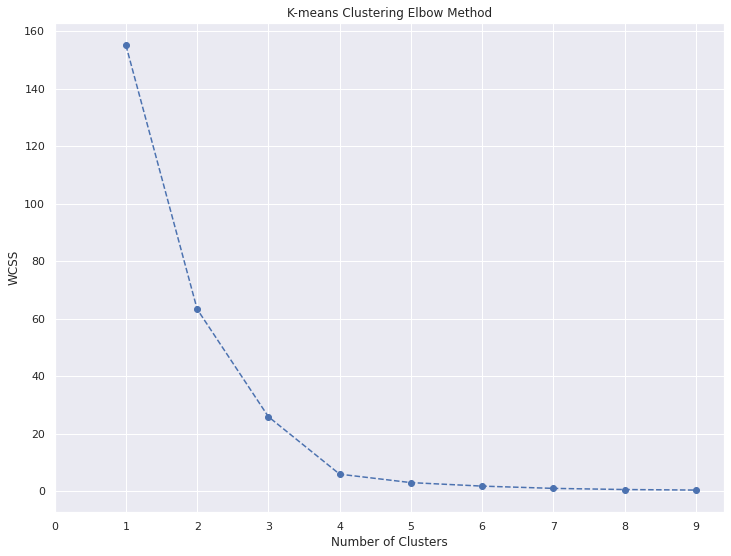

time: 564 ms


In [ ]:
wcss =[]
for i in range(1,10):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(reduced_data3)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 10, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

### Drawing the clusters with kmeans

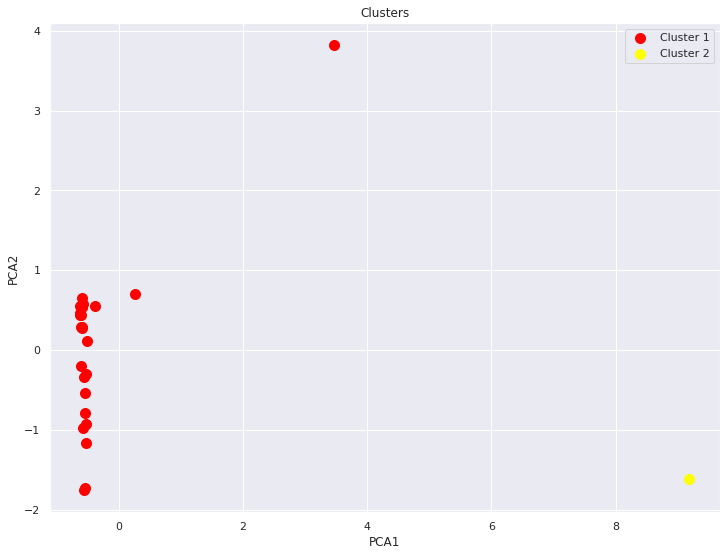

time: 359 ms


In [ ]:
#2 clusters
hc = KMeans(n_clusters = 2, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
#plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.7978069924787845
Davies-Bouldin Index:  0.1204620806613539
Calinski-Harabasz Index:  34.113230370266685
time: 13.5 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


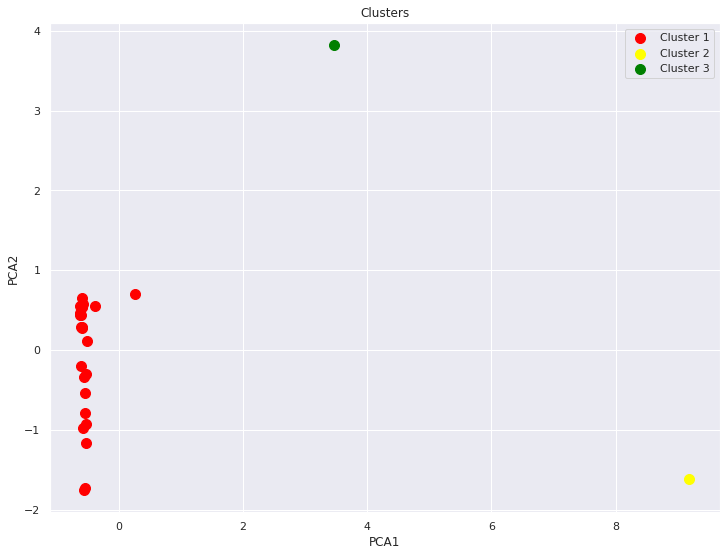

time: 373 ms


In [ ]:
#3 clusters
hc = KMeans(n_clusters = 3, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.7411351437463947
Davies-Bouldin Index:  0.13098997340386412
Calinski-Harabasz Index:  54.6624190816342
time: 12.4 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


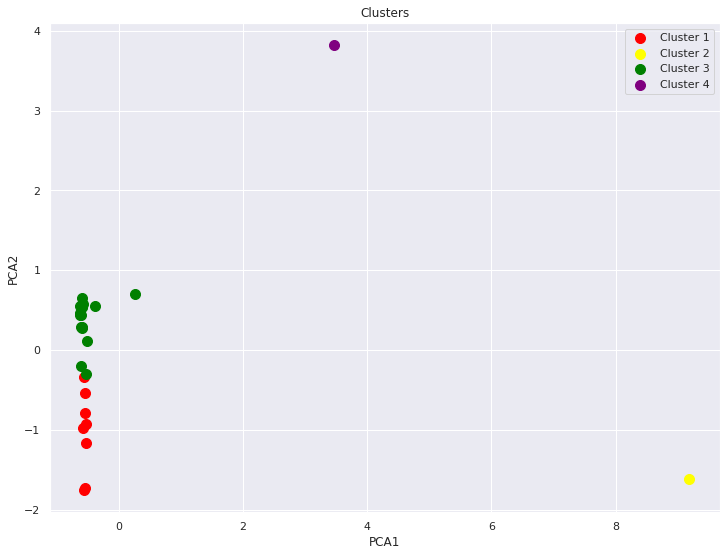

time: 389 ms


In [ ]:
#4 clusters
hc = KMeans(n_clusters = 4, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.5830753902612762
Davies-Bouldin Index:  0.27798955451672497
Calinski-Harabasz Index:  152.11991507279026
time: 17.4 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


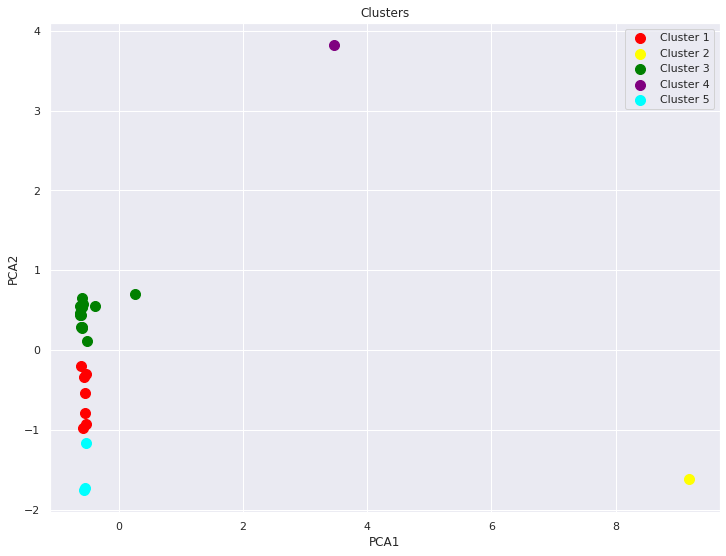

time: 401 ms


In [ ]:
#5 clusters
hc = KMeans(n_clusters = 5, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.5396080513282175
Davies-Bouldin Index:  0.3350914492113056
Calinski-Harabasz Index:  188.09077995039502
time: 15.4 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

time: 55.8 ms


In [ ]:
countries = pd.DataFrame(world['name'])

time: 1.64 ms


In [ ]:
countries.to_csv('countries.csv')

time: 93.9 ms


### Alternative visualization of clusters

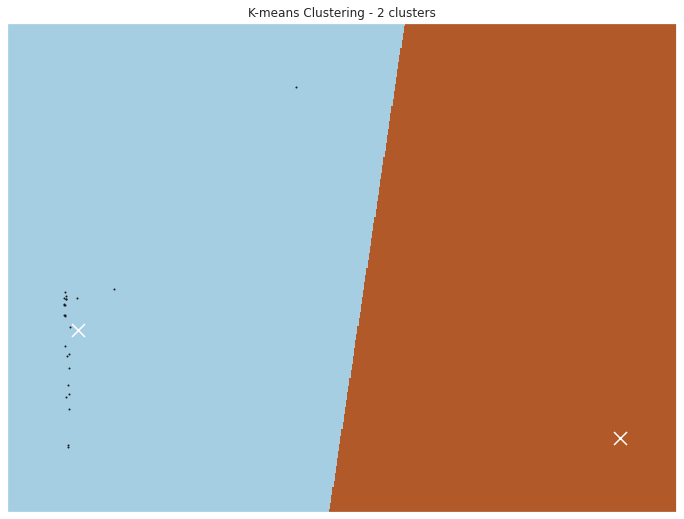

time: 420 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 2 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

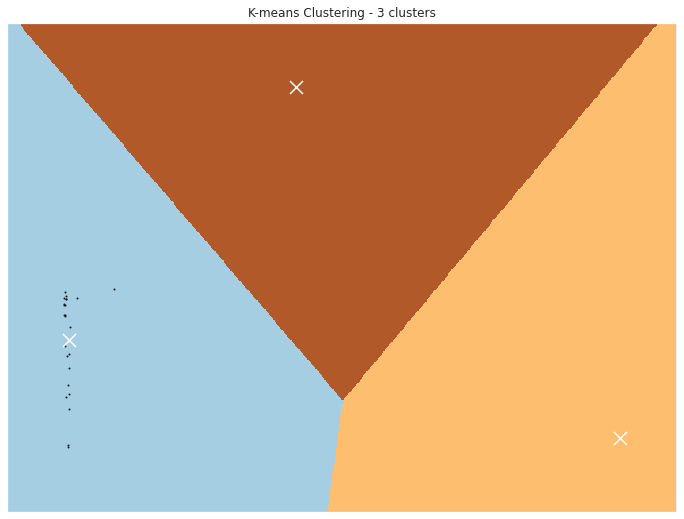

time: 393 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 3 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

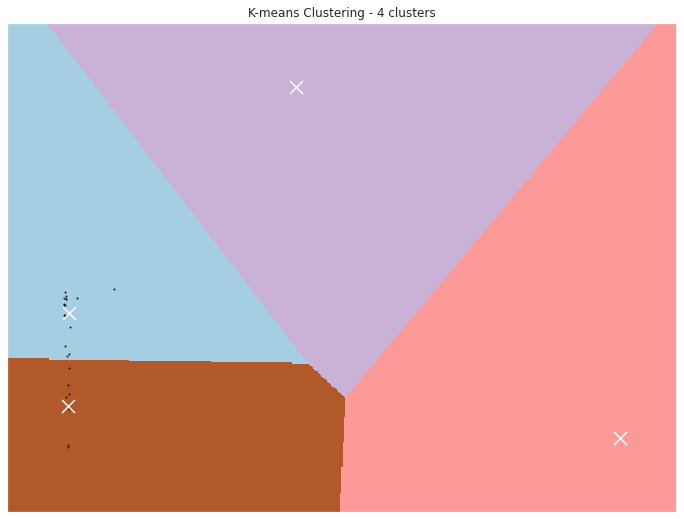

time: 426 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 4 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

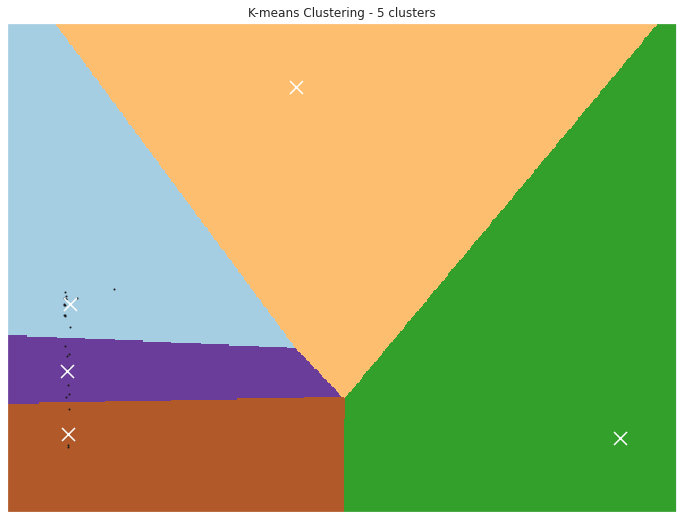

time: 453 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 5 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Map generation

# begin looping

In [ ]:
#X clusters
hc = KMeans(n_clusters = 4, random_state=42)
y_hc = hc.fit_predict(data)
y_hc.shape

predictions = pd.Series(y_hc, index=df.index)
df['predict'] = pd.Series(predictions)
df['predict'].to_csv('predictions.csv')

time: 125 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


# manual change countries.csv with values from predictions.csv and rename both

In [ ]:
countries = pd.read_csv('countries.csv')

time: 8.8 ms


# end looping

In [ ]:
world['predictions'] = countries['predictions']

time: 2.21 ms


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,predictions
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3.0


time: 34.3 ms


Text(0.5, 1.0, '2 clusters')

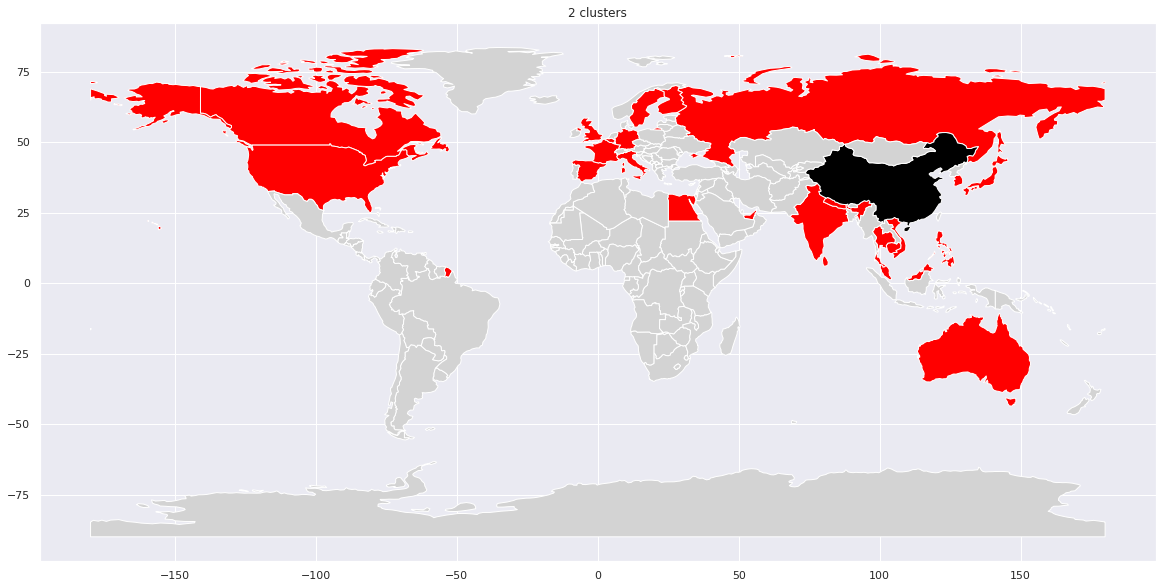

time: 649 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("2 clusters")

Text(0.5, 1.0, '3 clusters')

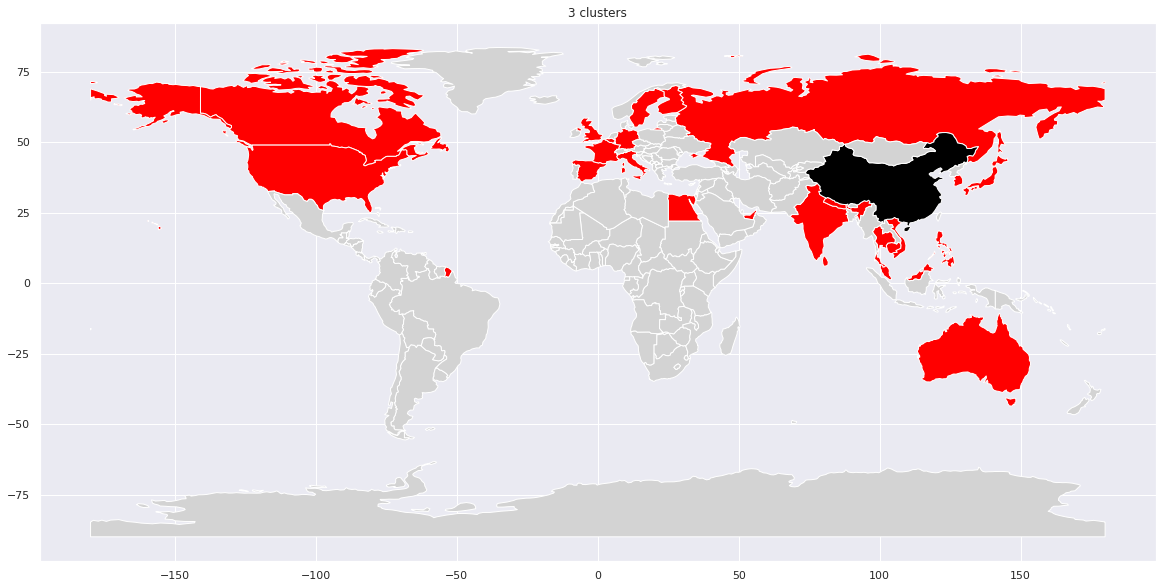

time: 629 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("3 clusters")
#singapore em cluster unico (lembrar que ela não aparece no geopandas, tem que inserir na mão)

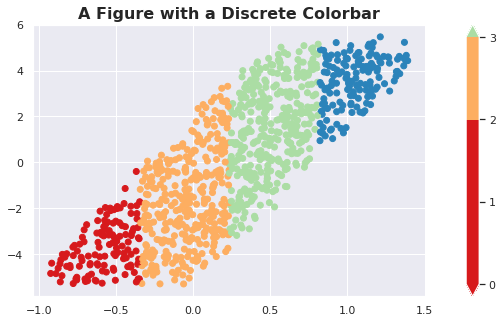

time: 412 ms


In [ ]:
import matplotlib as mpl
# Setting the figure size 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5), gridspec_kw = {'width_ratios':[3, 0.1]})

# Initializing the data
num = 1000
x1 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y1 = np.linspace(-5,5,num) + (0.5 - np.random.rand(num))

# Initializing colors and building a colormap
cmap = mpl.colors.ListedColormap(['#d7191c', '#fdae61', '#abdda4', '#2b83ba'])

# Setting the Colormap
ax1.scatter(x1, y1, c=x1, cmap=cmap)
ax1.set_title('A Figure with a Discrete Colorbar', fontsize=16, weight='bold')

# Setting the Discrete Colorbar
bounds = [0, 1, 2, 3]
mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                boundaries=[0] + bounds + [10],
                                extend='both',
                                ticks=bounds,spacing='proportional') 

# Displaying the figure
plt.show()

Text(0.5, 1.0, '4 clusters')

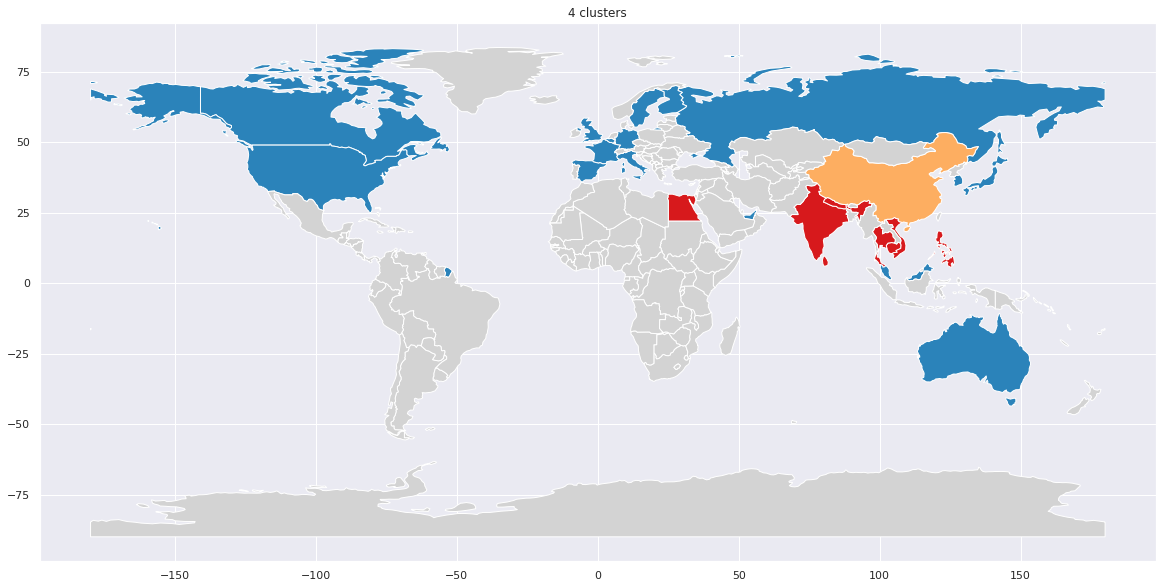

time: 688 ms


In [ ]:
ax = world.plot(column='predictions', cmap=cmap, figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("4 clusters")

Text(0.5, 1.0, '5 clusters')

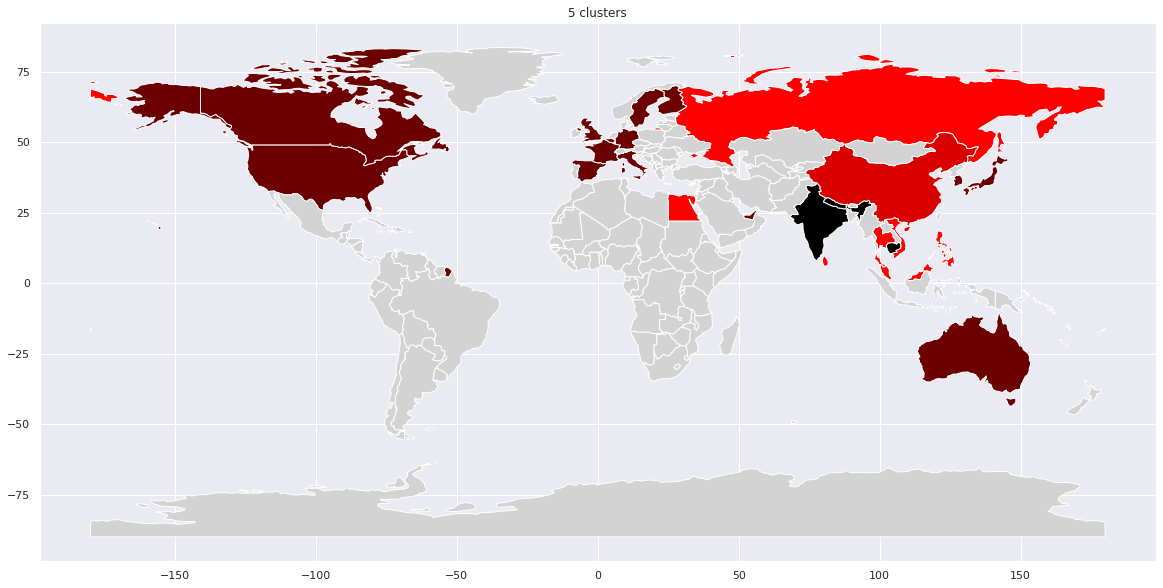

time: 639 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("5 clusters")